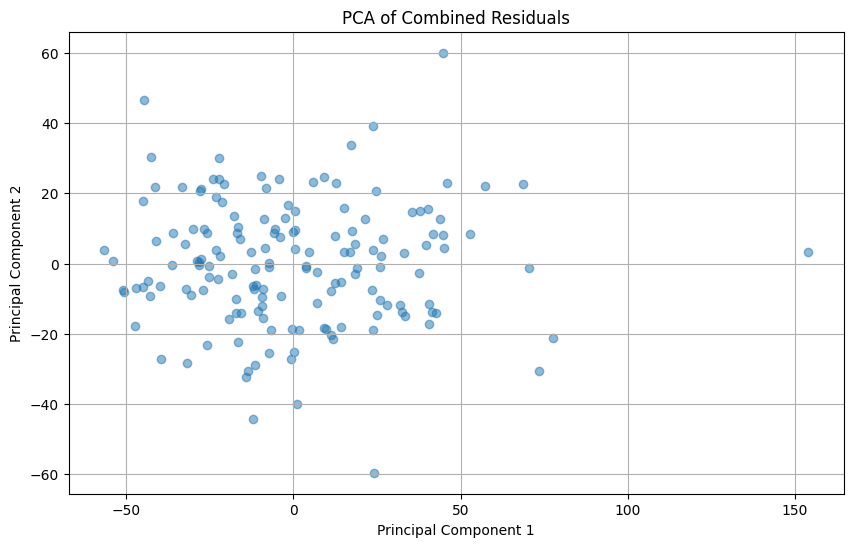

Explained variance by each component: [0.64555796 0.20062952 0.14618162]


In [8]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./EXOG_MONTHLY_MEDIAN_CONSOLIDATED.csv')
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)


# Initialize an empty DataFrame to store residuals
residuals_df = pd.DataFrame(index=data.index)

# Decompose each column and collect residuals
for column in data.columns[1:]:  # Skip 'Time' column
    decomposition = seasonal_decompose(data[column], model='additive', period=12)
    residuals = decomposition.resid
    residuals_df[column] = residuals

# Drop rows with NaN values that might have been introduced during decomposition
residuals_df = residuals_df.dropna()

# Perform PCA on the residuals
pca = PCA(n_components=3)  # You can adjust the number of components
principal_components = pca.fit_transform(residuals_df)

# Plotting the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Combined Residuals')
plt.grid(True)
plt.show()

# Display the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
